In [1]:
# Case Study-1
# The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 
    # Dataset: cars-dataset
# Attribute Information:
    # Car Name – Name of the car
    # Cyl – No of cylinders in the car – Multivalued discrete
    # Disp – Displacement – continuous
    # Hp – Horsepower – continuous
    # Wt – Weight – continuous
    # Acc – Accleration – continuous
    # Yr – Model of the car – Multivalued discrete
# Steps to follow:
    # 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
    # 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
    # 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
    # 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
cars_df = pd.read_csv("cars-dataset.csv")
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
 # Step 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [6]:
cars_df.dtypes
cars_df.isnull().sum()
cars_df.shape
cars_df.info()
cars_df.describe().T
cars_df.columns

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

(398, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [7]:
# No missing values found. So let us try to remove ? from the data set
cars_df[cars_df['hp'] == '?']
print('By observing the dataset - hp column has the special character ? which should be replaced')
cars_df['hp'][cars_df['hp'] == '?'].count()
cars_df['hp'] = cars_df['hp'].replace(['?'],0)
cars_df[cars_df['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


By observing the dataset - hp column has the special character ? which should be replaced


6

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [8]:
#step. 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [9]:
cars_df['hp'] = cars_df['hp'].astype('int')

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.804203
hp,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.754276
wt,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc5cd16f98>,
      dtype=object)

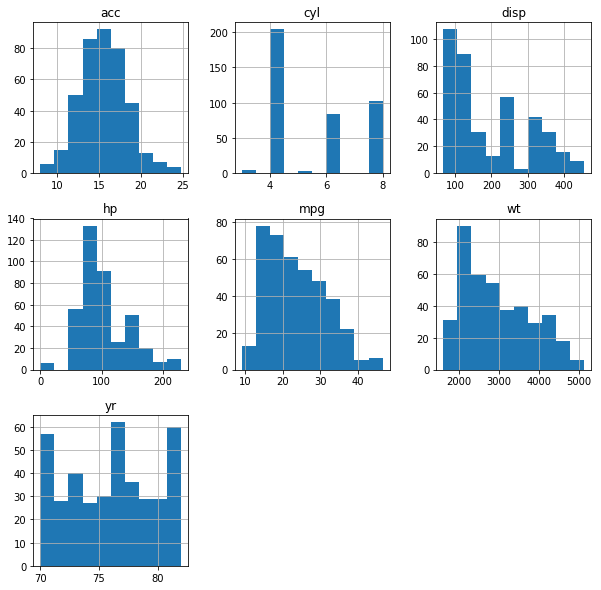

In [10]:
# Check for correlation of variable
cars_df.corr()
cars_df.hist(figsize =(10,10))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


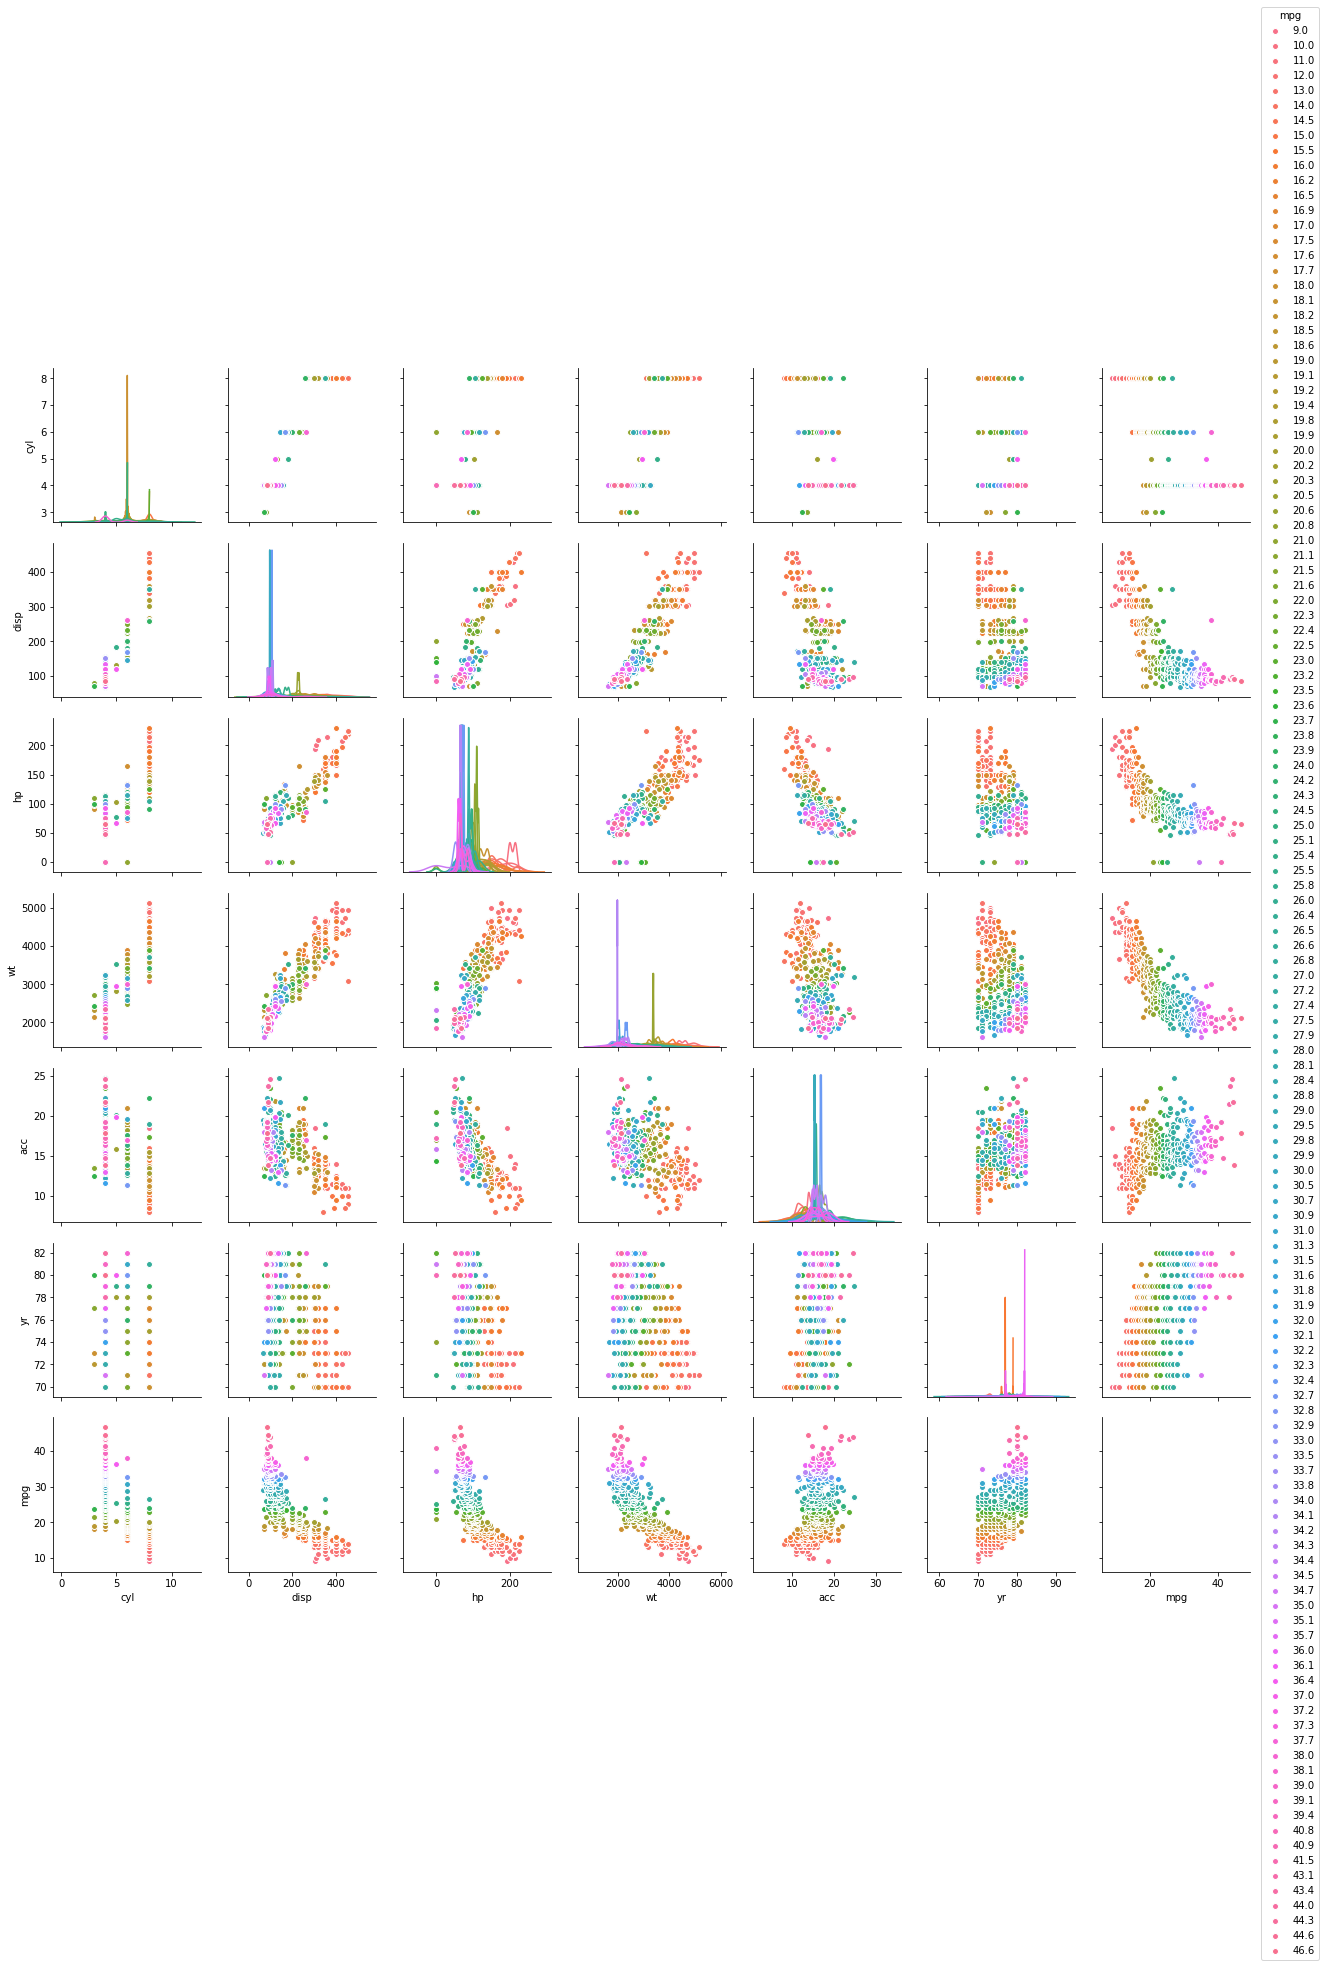

In [11]:
#Let us check for pair plots
sns.pairplot(cars_df, hue='mpg' ,diag_kind = 'kde')

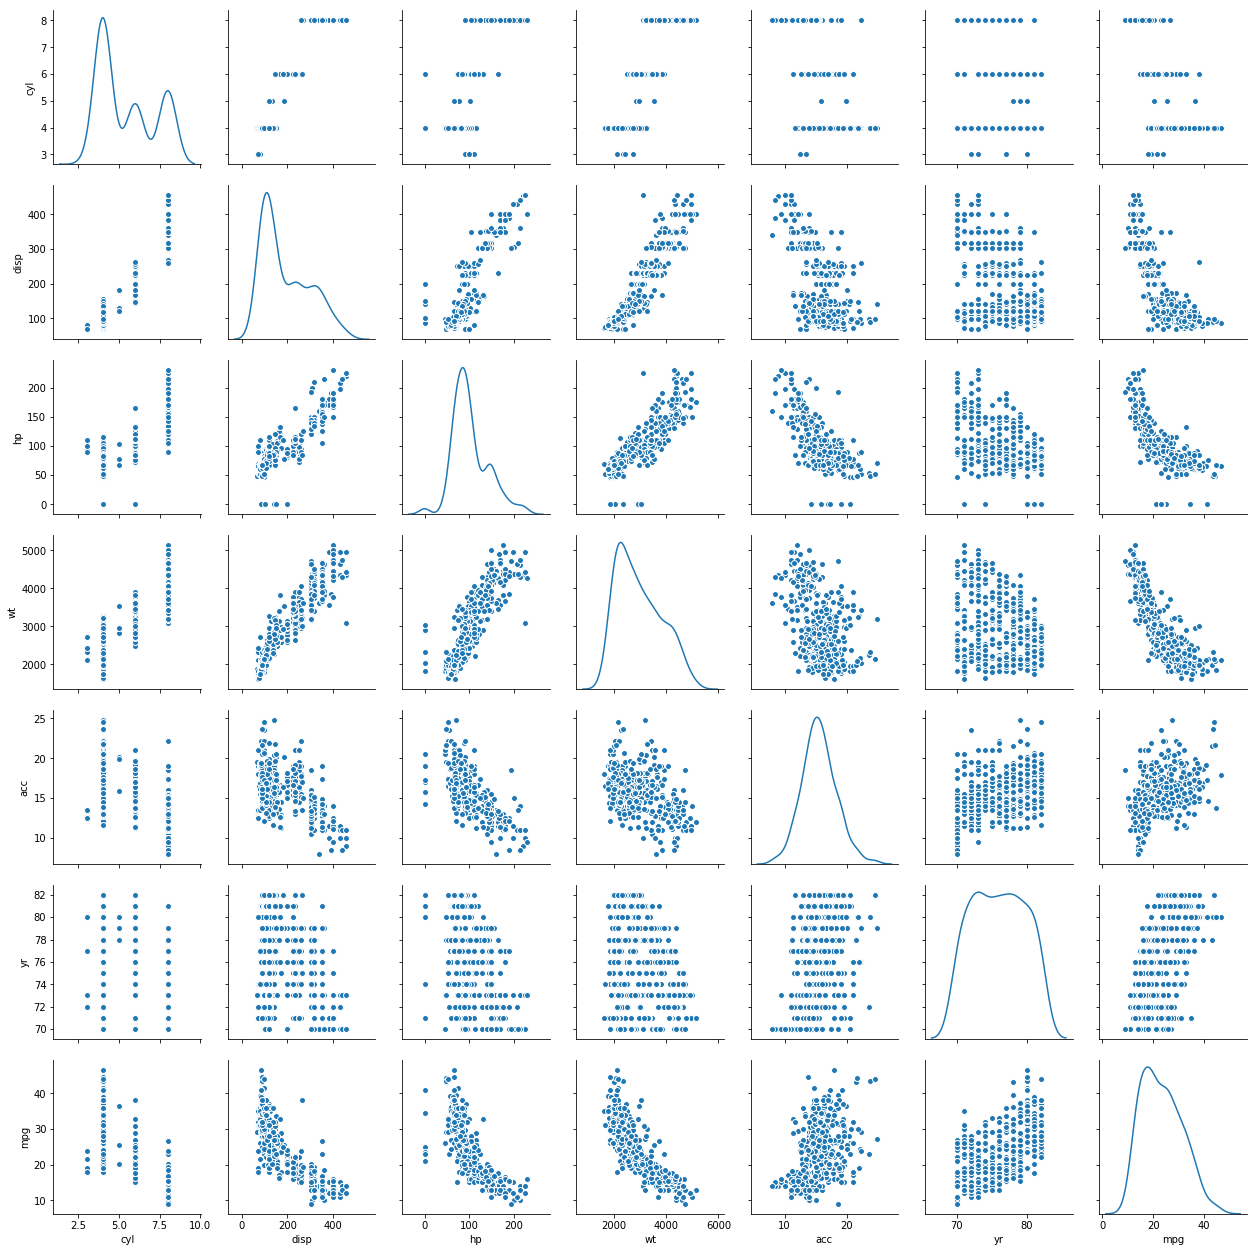

In [12]:
#Let us check for pair plots
sns.pairplot(cars_df ,diag_kind = 'kde')

In [113]:
print("Yr dosent looks like good contributor,wt and acc look homogenous, and other columns show good trend linearly in either of the direction ")

Yr dosent looks like good contributor,wt and acc look homogenous, and other columns show good trend linearly in either of the direction 


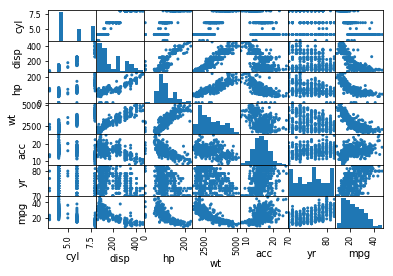

In [13]:
pd.plotting.scatter_matrix(cars_df, alpha=1.0);

In [14]:
# step.3 Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [15]:
from scipy.stats import zscore
cars_df_new = cars_df.drop('car name',axis=1)
cars_df_new = cars_df_new.apply(zscore)

In [16]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
print('K-meas Clustering')
print('Assign a dummy array called distortion')
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

K-meas Clustering
Assign a dummy array called distortion


In [17]:
print('Calculating distortion - C distance')
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cars_df_new)
    prediction=model.predict(cars_df_new)
    meanDistortions.append(sum(np.min(cdist(cars_df_new, model.cluster_centers_, 'euclidean'), axis=1)) / cars_df_new.shape[0])
   

Calculating distortion - C distance


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Plotting Elbow/ Scree Plot


Text(0.5,0,'k')

Text(0,0.5,'Average distortion')

Text(0.5,1,'Selecting k with the Elbow Method')

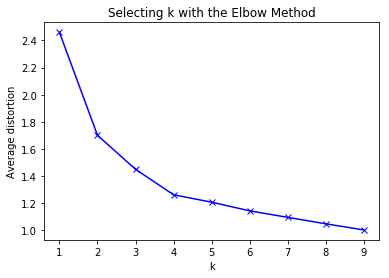

In [18]:
print("Plotting Elbow/ Scree Plot")
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [19]:
print("The optimal value of K is 4 ")

The optimal value of K is 4 


In [20]:
print("Reason is by looking in to the elbow plot , after k  = 4  data has  been average ")

Reason is by looking in to the elbow plot , after k  = 4  data has  been average 


In [21]:
# Let us first start with K = 3
final_model=KMeans(4)
final_model.fit(cars_df_new)
predictionk=final_model.predict(cars_df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
final_model.cluster_centers_

array([[ 0.4267561 ,  0.31085325,  0.00541753,  0.35090666,  0.2967454 ,
         0.05812892, -0.50075266],
       [-0.82506599, -0.78402235, -0.75275521, -0.77275084,  0.37884159,
         1.10677463,  1.18881992],
       [ 1.49819126,  1.50392292,  1.47938187,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.83900798, -0.7886291 , -0.53414429, -0.74406919,  0.3223385 ,
        -0.64251535,  0.19242419]])

In [23]:
cars_df_new = pd.DataFrame(final_model.cluster_centers_, columns = cars_df_new.columns)
print(cars_df_new)

        cyl      disp        hp        wt       acc        yr       mpg
0  0.426756  0.310853  0.005418  0.350907  0.296745  0.058129 -0.500753
1 -0.825066 -0.784022 -0.752755 -0.772751  0.378842  1.106775  1.188820
2  1.498191  1.503923  1.479382  1.404098 -1.086149 -0.688324 -1.163797
3 -0.839008 -0.788629 -0.534144 -0.744069  0.322339 -0.642515  0.192424


In [24]:
 cars_df["GROUP"] = predictionk

In [25]:
group_cluster1 = cars_df[cars_df["GROUP"]==1]
group_cluster0 = cars_df[cars_df["GROUP"]==0]
group_cluster2 = cars_df[cars_df["GROUP"]==2]
group_cluster3 = cars_df[cars_df["GROUP"]==3]

In [26]:
print("Clusters are segregated into 4 groups based on KNN, Applying linear regression on mpg as target as assumption")

Clusters are segregated into 4 groups based on KNN, Applying linear regression on mpg as target as assumption


In [27]:
cars_df.head()
group_cluster1.head()
group_cluster0.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0,2
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0,2
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0,2
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0,2
4,ford torino,8,302.0,140,3449,10.5,70,17.0,2


,car name,cyl,disp,hp,wt,acc,yr,mpg,GROUP
198,honda civic,4,91.0,53,1795,17.4,76,33.0,1
204,datsun b-210,4,85.0,70,1990,17.0,76,32.0,1
216,honda accord cvcc,4,98.0,68,2045,18.5,77,31.5,1
217,buick opel isuzu deluxe,4,111.0,80,2155,14.8,77,30.0,1
218,renault 5 gtl,4,79.0,58,1825,18.6,77,36.0,1


,car name,cyl,disp,hp,wt,acc,yr,mpg,GROUP
15,plymouth duster,6,198.0,95,2833,15.5,70,22.0,0
16,amc hornet,6,199.0,97,2774,15.5,70,18.0,0
33,amc gremlin,6,232.0,100,2634,13.0,71,19.0,0
34,plymouth satellite custom,6,225.0,105,3439,15.5,71,16.0,0
35,chevrolet chevelle malibu,6,250.0,100,3329,15.5,71,17.0,0


In [28]:
print("Dropping Car names")

Dropping Car names


In [29]:
group_cluster0.head()


,car name,cyl,disp,hp,wt,acc,yr,mpg,GROUP
15,plymouth duster,6,198.0,95,2833,15.5,70,22.0,0
16,amc hornet,6,199.0,97,2774,15.5,70,18.0,0
33,amc gremlin,6,232.0,100,2634,13.0,71,19.0,0
34,plymouth satellite custom,6,225.0,105,3439,15.5,71,16.0,0
35,chevrolet chevelle malibu,6,250.0,100,3329,15.5,71,17.0,0


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics

In [31]:
print("Since Coeff is asked on all 3 clusters, Applying directly without any test and train")

Since Coeff is asked on all 3 clusters, Applying directly without any test and train


In [32]:
group_cluster0["cyl"].value_counts()
print("Applying zscore makes cyl null, So dropping it as almost all are same values")

6    78
8     9
5     2
Name: cyl, dtype: int64

Applying zscore makes cyl null, So dropping it as almost all are same values


In [34]:
group_cluster0 = group_cluster0.drop(columns = ['GROUP','car name'],axis = 1)
group_cluster0z = group_cluster0.apply(zscore)
X = group_cluster0z.drop('mpg',axis = 1)
Y = group_cluster0z['mpg']


In [35]:
regression_model = LinearRegression()
regression_model.fit(X, Y)
regression_model.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([ 0.17841508, -0.01333937, -0.15709345, -0.42857514, -0.14356422,
        0.53765004])

In [37]:
group_cluster1["cyl"].value_counts()

4    108
6      3
5      1
3      1
Name: cyl, dtype: int64

In [38]:
group_cluster1 = group_cluster1.drop(columns = ['GROUP','car name'],axis = 1)
group_cluster1z = group_cluster1.apply(zscore)
X = group_cluster1z.drop('mpg',axis = 1)
Y = group_cluster1z['mpg']
regression_model = LinearRegression()
regression_model.fit(X, Y)
regression_model.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([ 0.35004627, -0.07303248, -0.02674004, -0.74150211,  0.23871003,
        0.23153123])

In [40]:

group_cluster2["cyl"].value_counts()
print("dropping cyl as only one single cyl 8 is available in all cluster2")

8    94
Name: cyl, dtype: int64

dropping cyl as only one single cyl 8 is available in all cluster2


In [41]:
group_cluster2 = group_cluster2.drop(columns = ['GROUP','car name','cyl'],axis = 1)
group_cluster2z = group_cluster2.apply(zscore)
X = group_cluster2z.drop('mpg',axis = 1)
Y = group_cluster2z['mpg']
regression_model = LinearRegression()
regression_model.fit(X, Y)
regression_model.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([-0.11697292, -0.23083687, -0.225246  , -0.4285565 ,  0.49230405])

In [42]:
group_cluster3["cyl"].value_counts()

4    96
6     3
3     3
Name: cyl, dtype: int64

In [43]:
group_cluster3 = group_cluster3.drop(columns = ['GROUP','car name'],axis = 1)
group_cluster3z = group_cluster3.apply(zscore)
X = group_cluster3z.drop('mpg',axis = 1)
Y = group_cluster3z['mpg']
regression_model = LinearRegression()
regression_model.fit(X, Y)
regression_model.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([ 0.30032064, -0.33508196, -0.00243611, -0.61499705, -0.05651135,
        0.24692626])

In [44]:
print("Al the coeff for 4 cluster has been printed")

Al the coeff for 4 cluster has been printed


In [ ]:
 # step -4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [ ]:
# Case Study-2
# The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
# Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
# van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
# The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
# Dataset: vehicle
# Steps to follow:
    # 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
    # 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
    # 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
    # 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [60]:
vehicle_df = pd.read_csv('vehicle.csv')

vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [61]:
vehicle_df.dtypes
vehicle_df.isnull().sum()
vehicle_df.shape
vehicle_df.info()
vehicle_df.describe().T
vehicle_df.columns

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

(846, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [ ]:
#step  1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [107]:
vehicle_df_plt = pd.read_csv('vehicle.csv')

In [108]:
# Check for correlation of variable
vehicle_df.corr()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc36ce9048>,
      dtype=object)

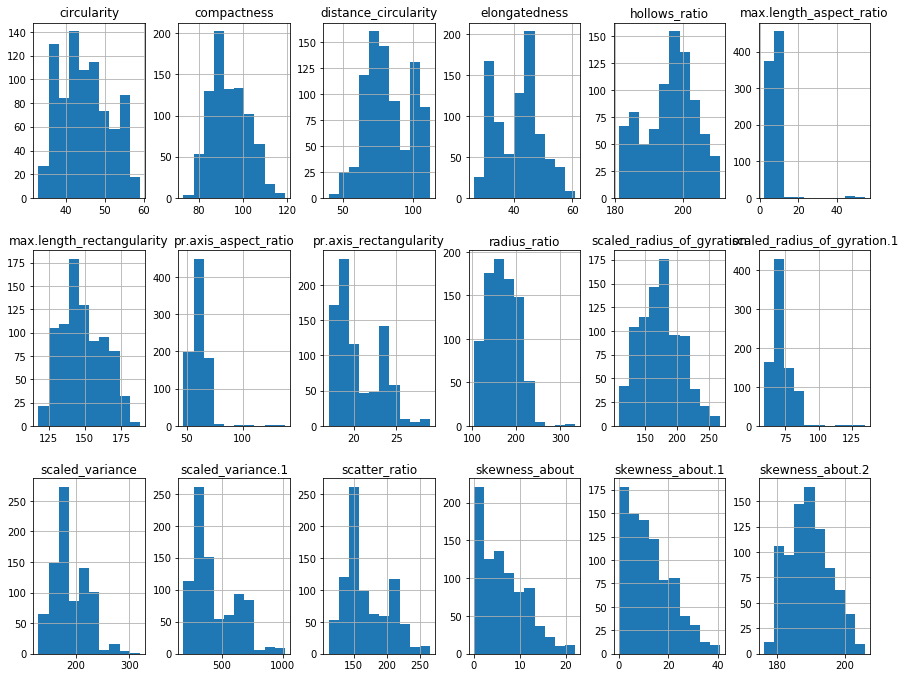

In [110]:
vehicle_df_plt.hist(figsize =(15,20),layout = (5,6))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


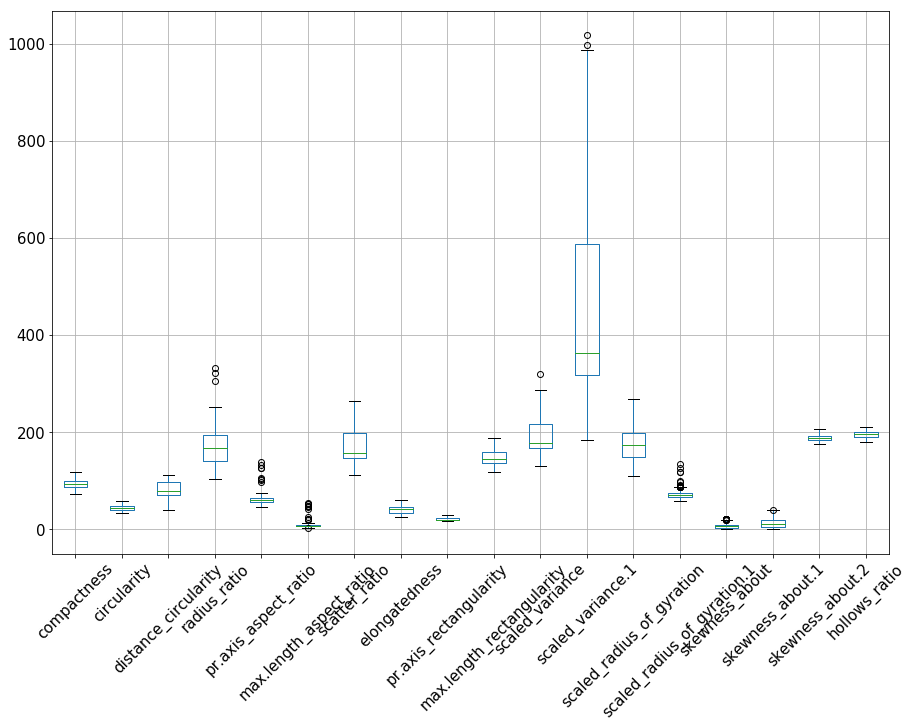

In [50]:
vehicle_df.plot.box(grid='True',layout=(2,4), figsize=(15, 10),rot=45, fontsize=15)

In [112]:
print("Looks Scaled radius of gyration, pr.axis_aspect_ratio,max.length_aspect_ratio, radius ratio has huge outliers, All the skewness column looks right skewed")
print("Missing values has been replaced with mean")
print("Not sure of dropping columns as it needs domain expert verifycation")

Looks Scaled radius of gyration, pr.axis_aspect_ratio,max.length_aspect_ratio, radius ratio has huge outliers, All the skewness column looks right skewed
Missing values has been replaced with mean
Not sure of dropping columns as it needs domain expert verifycation


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [65]:
vehicle_df.fillna(vehicle_df.mean(),inplace =True)


AttributeError: 'function' object has no attribute 'sum'

In [66]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [67]:
vehicle_df.head()
vechicle_target = vehicle_df["class"]
vehicle_df = vehicle_df.drop(labels = ["class"], axis = 1)
vehicle_df = vehicle_df.apply(zscore)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [68]:
X_centered = vehicle_df - vehicle_df.mean(axis=0)
pca = PCA().fit(X_centered)
pca.explained_variance_
np.cumsum(pca.explained_variance_ratio_)
pca.components_
print("Normalised eigen vector")

array([9.40828822e+00, 3.01605477e+00, 1.90347881e+00, 1.18027268e+00,
       9.17174067e-01, 5.39279825e-01, 3.58566463e-01, 2.21661730e-01,
       1.60036194e-01, 9.17140864e-02, 6.65751851e-02, 4.59556829e-02,
       3.54023825e-02, 2.67096104e-02, 2.03690624e-02, 1.74414127e-02,
       9.23357029e-03, 3.08801865e-03])

array([0.52206485, 0.68942539, 0.79504921, 0.86054241, 0.9114363 ,
       0.94136087, 0.96125769, 0.97355767, 0.98243806, 0.98752726,
       0.99122151, 0.99377159, 0.99573606, 0.99721818, 0.99834845,
       0.99931628, 0.99982865, 1.        ])

array([[ 2.75259459e-01,  2.93392341e-01,  3.04556452e-01,
         2.67593206e-01,  8.04938998e-02,  9.72198560e-02,
         3.16872006e-01, -3.14042361e-01,  3.13953009e-01,
         2.82790417e-01,  3.09310530e-01,  3.14149034e-01,
         2.72002525e-01, -2.09179819e-02,  4.13316728e-02,
         5.83331566e-02,  3.01560495e-02,  7.40813666e-02],
       [-1.27010856e-01,  1.26217125e-01, -7.26862818e-02,
        -1.89635192e-01, -1.22158741e-01,  1.07277825e-02,
         4.80473095e-02,  1.27991503e-02,  6.00351423e-02,
         1.16182501e-01,  6.17536908e-02,  5.32757796e-02,
         2.09279660e-01,  4.88541866e-01, -5.49212020e-02,
        -1.24152855e-01, -5.40947666e-01, -5.40279812e-01],
       [-1.19874162e-01, -2.51835016e-02, -5.60058748e-02,
         2.75066087e-01,  6.42046458e-01,  5.91799912e-01,
        -9.76530949e-02,  5.74645766e-02, -1.09509169e-01,
        -1.69994013e-02,  5.64656174e-02, -1.08711428e-01,
        -3.13685232e-02,  2.86211092e-01, -1.15693651e

Normalised eigen vector


In [70]:
X_pca = pca.transform(X_centered)

<Figure size 720x504 with 0 Axes>

Text(0.5,0,'Number of components')

Text(0,0.5,'Total explained variance')

(0, 63)

([<matplotlib.axis.YTick at 0x7efc36c8f3c8>,
 <a list of 11 Text yticklabel objects>)

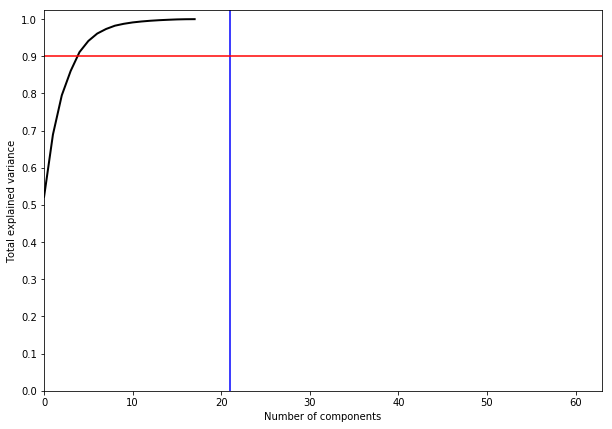

In [71]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [72]:
print("Looks 95% of variance captured at 7 compnents")

Looks 95% of variance captured at 7 compnents


In [73]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [75]:
vehicle_df_svm = pd.read_csv('vehicle.csv')
vehicle_df_svm.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [80]:

vehicle_df_svm["class"] = vehicle_df_svm["class"].astype("category")
vehicle_df_svm["Class_Code"] = vehicle_df_svm["class"].cat.codes

In [93]:
vehicle_df_svm.fillna(vehicle_df_svm.mean(),inplace = True)


In [94]:
X = vehicle_df_svm.drop(columns = ["class","Class_Code"])
X = X.apply(zscore)

In [95]:
Y = vehicle_df_svm["Class_Code"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=1)

In [97]:
X_train.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [98]:
pca  = PCA(n_components=7)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [100]:
from sklearn import svm

In [101]:
svc = svm.SVC().fit(pca.transform(X_train),y_train)
l = svc.predict(pca.transform(X_test))
svc.score(pca.transform(X_test),y_test)

0.905511811023622

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, cv=10,n_jobs=-1)
#Learning
model1.fit(pca.transform(X_train),y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(pca.transform(X_test))
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.905511811023622
Confusion Matrix:
 [[ 60   4   0]
 [  3 115   5]
 [  2  10  55]]
